# New Section

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Computation of Data





In [7]:
print("Enter Elements:")
input_array = list(map(int,input().split()))
input_array = np.array(input_array)
sum = np.sum(input_array)
product = np.prod(input_array)
mean = np.mean(input_array)
std = np.std(input_array)
print(sum, product, mean, std)

Enter Elements:
4 6 7 8 12
37 16128 7.4 2.65329983228432


In [8]:
print(np.sort(input_array))

[ 4  6  7  8 12]


In [9]:
indices = [0,2,4]
print(input_array[indices])
print(input_array[1:3])

[ 4  7 12]
[6 7]


# Handling of Missing Data



In [11]:
data = {
    'A':[1,2,3,np.nan,np.nan,6],
    'B':[3,4,5,6,7,np.nan]
}

df = pd.DataFrame(data)
df.loc[1:4,'A'] = 'NIL'
df.loc[0:2,'B'] = 0
print(df)

     A    B
0  1.0  0.0
1  NIL  0.0
2  NIL  0.0
3  NIL  6.0
4  NIL  7.0
5  6.0  NaN


In [14]:
dfcleanrows = df.dropna()
dfcleancolumns = df.dropna(axis=1)
dfcleanallrows = df.dropna(axis=0, how="all")
dfcleanallcolumns = df.dropna(how="all",axis=1)
print(dfcleanrows)
print(dfcleancolumns)
print(dfcleanallcolumns)
print(dfcleanallrows)

     A    B
0  1.0  0.0
1  NIL  0.0
2  NIL  0.0
3  NIL  6.0
4  NIL  7.0
     A
0  1.0
1  NIL
2  NIL
3  NIL
4  NIL
5  6.0
     A    B
0  1.0  0.0
1  NIL  0.0
2  NIL  0.0
3  NIL  6.0
4  NIL  7.0
5  6.0  NaN
     A    B
0  1.0  0.0
1  NIL  0.0
2  NIL  0.0
3  NIL  6.0
4  NIL  7.0
5  6.0  NaN


In [23]:
df_cleaned = df.dropna(subset=['A','B'], axis=0)
print(df_cleaned)

     A     B   C
0  1.0   6.0  11
2  3.0   8.0  13
4  5.0  10.0  15


In [21]:
df_constantfill = df.fillna(-1)
df_aggregratedfill = df.fillna(df.median())
print(df_constantfill)
print(df_aggregratedfill)

     A     B   C
0  1.0   6.0  11
1  2.0  -1.0  12
2  3.0   8.0  13
3 -1.0   9.0  14
4  5.0  10.0  15
     A     B   C
0  1.0   6.0  11
1  2.0   8.5  12
2  3.0   8.0  13
3  2.5   9.0  14
4  5.0  10.0  15


In [24]:
df_forwardfill = df.fillna(method='ffill')
df_backwardfill = df.fillna(method='bfill')
print(df_forwardfill)
print(df_backwardfill)

     A     B   C
0  1.0   6.0  11
1  2.0   6.0  12
2  3.0   8.0  13
3  3.0   9.0  14
4  5.0  10.0  15
     A     B   C
0  1.0   6.0  11
1  2.0   8.0  12
2  3.0   8.0  13
3  5.0   9.0  14
4  5.0  10.0  15


# Curve Fitting

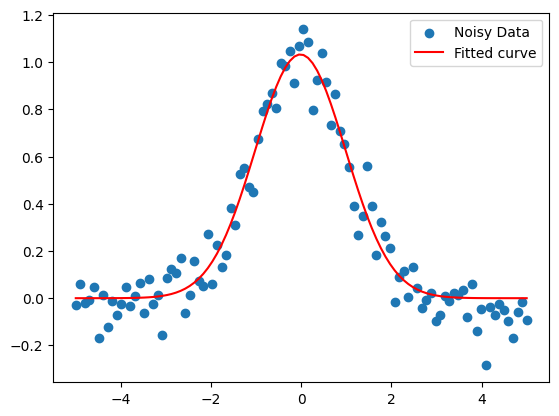

In [ ]:
def gaussian(x, amplitude, mean, stddev):
  return amplitude*np.exp(-((x-mean)/stddev)**2/2)

x_data = np.linspace(-5,5,100)
y_data = gaussian(x_data, amplitude=1, mean=0, stddev=1)+0.1*np.random.normal(size=len(x_data))
plt.scatter(x_data, y_data, label='Noisy Data')

initial_guess = [1,0,1]
params, covariance = curve_fit(gaussian, x_data, y_data, p0=initial_guess)

y_fit = gaussian(x_data, *params)
plt.plot(x_data, y_fit, label='Fitted curve', color='red')

plt.legend()
plt.show()

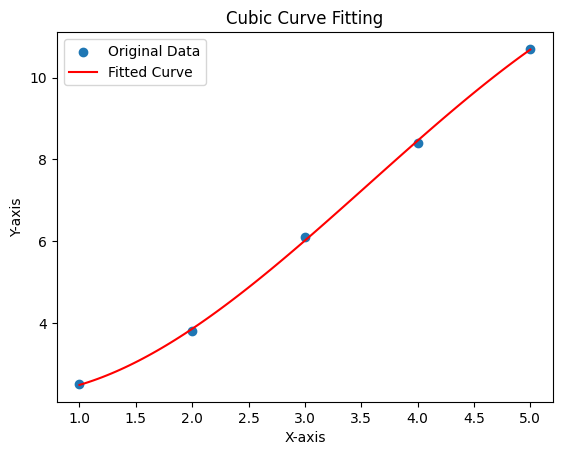

In [ ]:
#or you can use this code

def cubic_function(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2.5, 3.8, 6.1, 8.4, 10.7])

params, covariance = curve_fit(cubic_function, x_data, y_data)

plt.scatter(x_data, y_data, label='Original Data')

x_fit = np.linspace(1, 5, 100)
y_fit = cubic_function(x_fit, *params)
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Cubic Curve Fitting')
plt.show()


# Linear Regression

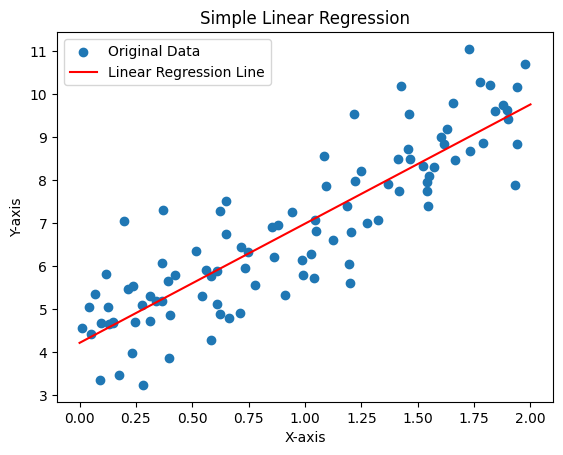

In [26]:
np.random.seed(42)
x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

model = LinearRegression()
model.fit(x,y)

x_new = np.array([[0],[2]])
y_pred = model.predict(x_new)

plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_pred, 'r-', label='Linear Regression Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()

# Polynomial Regression


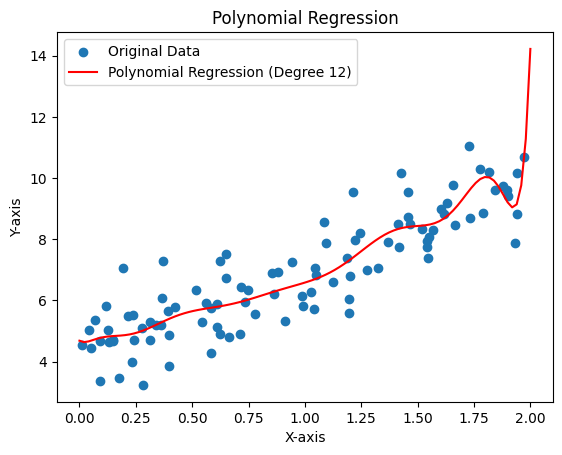

In [27]:
degree = 12
model = make_pipeline(PolynomialFeatures(degree),LinearRegression())

model.fit(x,y)
x_new = np.linspace(0,2,100).reshape(-1,1)
y_pred = model.predict(x_new)

plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_pred, 'r-', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Polynomial Regression')
plt.show()

# Exponential Regression


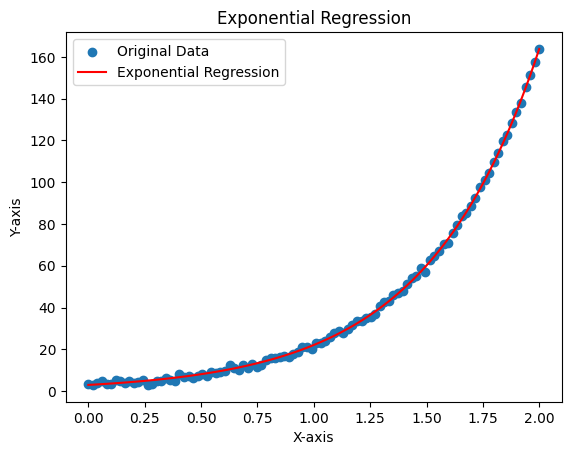

In [ ]:
def exp_func(x,a,b):
  return a*np.exp(b*x)

np.random.seed(42)
X = np.linspace(0, 2, 100)
y = 3 * np.exp(2 * X) + np.random.randn(100)

params, covariance = curve_fit(exp_func, X, y)

plt.scatter(X, y, label='Original Data')

X_fit = np.linspace(0, 2, 100)
y_fit = exp_func(X_fit, *params)
plt.plot(X_fit, y_fit, 'r-', label='Exponential Regression')

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Exponential Regression')
plt.show()

# KNN Classifier

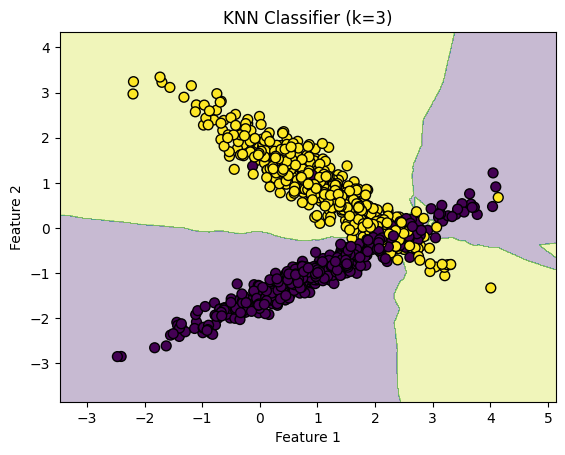

In [ ]:
x,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2,
    n_redundant=0,  n_clusters_per_class=1, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_test)

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title("KNN Classifier (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Finding of Outliers

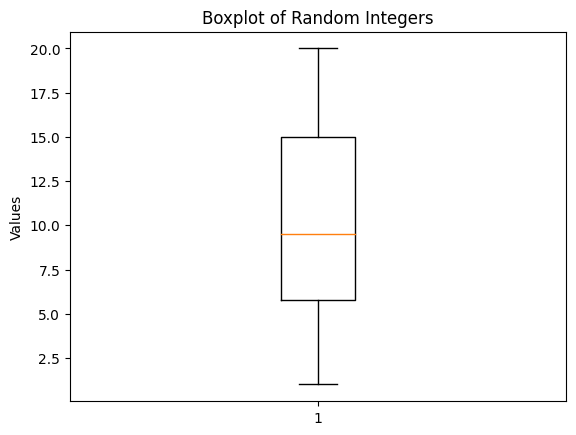

In [29]:
np.random.seed(42)
data = np.random.randint(1, 21, 100)

plt.boxplot(data)
plt.title('Boxplot of Random Integers')
plt.ylabel('Values')
plt.show()

# Histogram, Barchart & Pie Chart


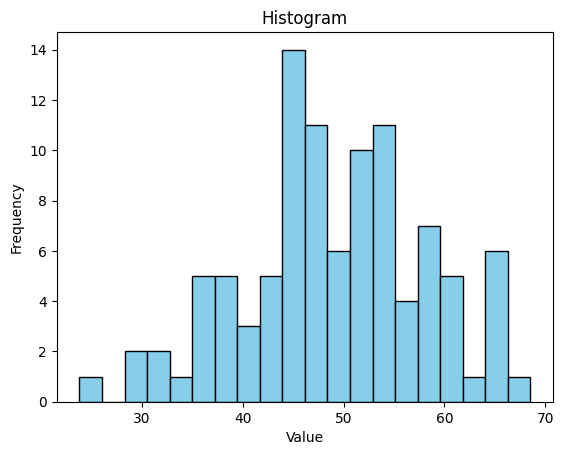

In [31]:
np.random.seed(42)
mean=50
sigma=10
size=100
data = np.random.normal(mean,sigma,size)
fig,ax = plt.subplots()
ax.hist(data,bins=20,color='skyblue',edgecolor='black')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram')
plt.show()

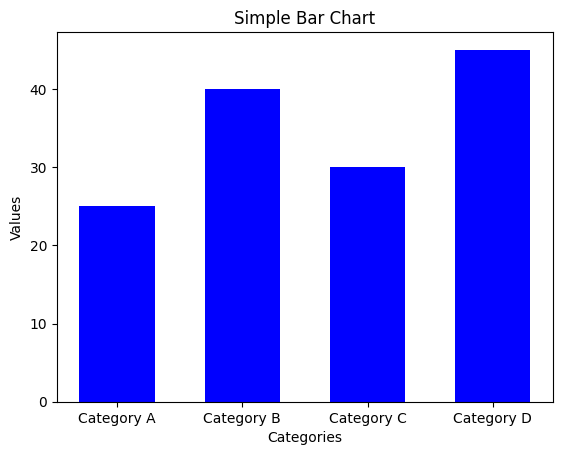

In [33]:
import matplotlib.pyplot as plt

categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [25, 40, 30, 45]

plt.bar(categories, values, color='blue', width=0.6)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Simple Bar Chart')

plt.show()


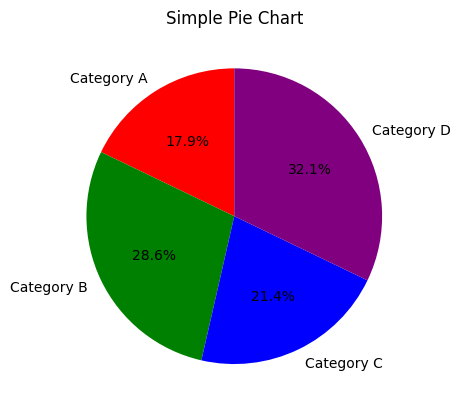

In [34]:
import matplotlib.pyplot as plt

labels = ['Category A', 'Category B', 'Category C', 'Category D']
sizes = [25, 40, 30, 45]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'purple'])

plt.title('Simple Pie Chart')

plt.show()


# 2D & 3D Plot


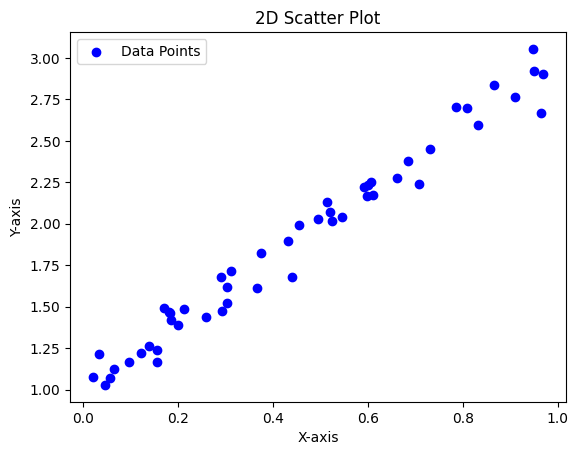

In [35]:
np.random.seed(42)
x = np.random.rand(50)
y = 2 * x + 1 + 0.1 * np.random.randn(50)

plt.scatter(x, y, color='blue', marker='o', label='Data Points')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Scatter Plot')

plt.legend()

plt.show()

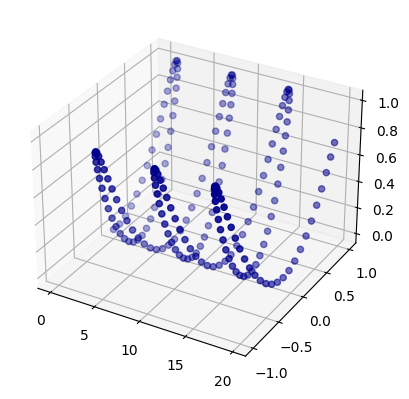

In [42]:
x = np.arange(0,20,0.1)
y = np.sin(x)
z = y*np.sin(x)
ax = plt.axes(projection='3d')
ax.scatter(x,y,z, color='darkblue')
plt.show()